In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

from collections import Counter
import re

In [2]:
############# Sei

sei_supp_table_1 = pd.read_excel('../data/Sei/41588_2022_1102_MOESM3_ESM.xlsx', sheet_name='Supp Table 1', skiprows=1)


sei_supp_table_1[['cell_name', 'assay', 'source', 'part']] = (
    sei_supp_table_1['Chromatin Profile']
    .str.split(r"\s*\|\s*", n=3, expand=True)
)
sei_supp_table_1['index'] = sei_supp_table_1.index
sei_supp_table_1

,Chromatin Profile,AUROC,AUPRC,cell_name,assay,source,part,index
0,HeLa_Epithelium_Cervix | BTAF1 | ID:1,0.983,0.033,HeLa_Epithelium_Cervix,BTAF1,ID:1,None,0
1,H9_Embryonic_Stem_Cell_Embryo | EOMES | ID:1006,0.963,0.380,H9_Embryonic_Stem_Cell_Embryo,EOMES,ID:1006,None,1
2,H9_Embryonic_Stem_Cell_Embryo | EP300 | ID:1007,0.987,0.516,H9_Embryonic_Stem_Cell_Embryo,EP300,ID:1007,None,2
3,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1010,0.954,0.207,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1010,None,3
4,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1011,0.962,0.135,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1011,None,4
...,...,...,...,...,...,...,...,...
21902,WERI-Rb-1 | CTCF | ENCODE,0.997,0.665,WERI-Rb-1,CTCF,ENCODE,None,21902
21903,WERI-Rb-1 | DNase | ENCODE,0.968,0.386,WERI-Rb-1,DNase,ENCODE,None,21903
21904,WI-38 | CTCF | ENCODE,0.997,0.686,WI-38,CTCF,ENCODE,None,21904
21905,WI-38 (4OHTAM_20nM_72hr) | DNase | ENCODE,0.963,0.385,WI-38 (4OHTAM_20nM_72hr),DNase,ENCODE,None,21905


In [3]:
sei_supp_table_1[['cell_name', 'assay', 'source', 'part']] = (
    sei_supp_table_1['Chromatin Profile']
    .str.split(r"\s*\|\s*", n=3, expand=True)
)
sei_supp_table_1['index'] = sei_supp_table_1.index
sei_supp_table_1

,Chromatin Profile,AUROC,AUPRC,cell_name,assay,source,part,index
0,HeLa_Epithelium_Cervix | BTAF1 | ID:1,0.983,0.033,HeLa_Epithelium_Cervix,BTAF1,ID:1,None,0
1,H9_Embryonic_Stem_Cell_Embryo | EOMES | ID:1006,0.963,0.380,H9_Embryonic_Stem_Cell_Embryo,EOMES,ID:1006,None,1
2,H9_Embryonic_Stem_Cell_Embryo | EP300 | ID:1007,0.987,0.516,H9_Embryonic_Stem_Cell_Embryo,EP300,ID:1007,None,2
3,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1010,0.954,0.207,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1010,None,3
4,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1011,0.962,0.135,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1011,None,4
...,...,...,...,...,...,...,...,...
21902,WERI-Rb-1 | CTCF | ENCODE,0.997,0.665,WERI-Rb-1,CTCF,ENCODE,None,21902
21903,WERI-Rb-1 | DNase | ENCODE,0.968,0.386,WERI-Rb-1,DNase,ENCODE,None,21903
21904,WI-38 | CTCF | ENCODE,0.997,0.686,WI-38,CTCF,ENCODE,None,21904
21905,WI-38 (4OHTAM_20nM_72hr) | DNase | ENCODE,0.963,0.385,WI-38 (4OHTAM_20nM_72hr),DNase,ENCODE,None,21905


In [4]:
sei_supp_table_2 = pd.read_excel('../data/Sei/41588_2022_1102_MOESM3_ESM.xlsx', sheet_name='Supp Table 2', skiprows=1)
cell_name_map_dict = sei_supp_table_2.set_index('Original Cell Type Name')['Standardized Celltype Name'].to_dict()

sei_supp_table_1['cell_type'] = sei_supp_table_1['cell_name'].map(cell_name_map_dict)
sei_supp_table_1

,Chromatin Profile,AUROC,AUPRC,cell_name,assay,source,part,index,cell_type
0,HeLa_Epithelium_Cervix | BTAF1 | ID:1,0.983,0.033,HeLa_Epithelium_Cervix,BTAF1,ID:1,None,0,HeLa_Cervical_Carcinoma
1,H9_Embryonic_Stem_Cell_Embryo | EOMES | ID:1006,0.963,0.380,H9_Embryonic_Stem_Cell_Embryo,EOMES,ID:1006,None,1,H9_Embryonic_Stem_Cell_Embryo
2,H9_Embryonic_Stem_Cell_Embryo | EP300 | ID:1007,0.987,0.516,H9_Embryonic_Stem_Cell_Embryo,EP300,ID:1007,None,2,H9_Embryonic_Stem_Cell_Embryo
3,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1010,0.954,0.207,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1010,None,3,H9_Embryonic_Stem_Cell_Embryo
4,H9_Embryonic_Stem_Cell_Embryo | FOXH1 | ID:1011,0.962,0.135,H9_Embryonic_Stem_Cell_Embryo,FOXH1,ID:1011,None,4,H9_Embryonic_Stem_Cell_Embryo
...,...,...,...,...,...,...,...,...,...
21902,WERI-Rb-1 | CTCF | ENCODE,0.997,0.665,WERI-Rb-1,CTCF,ENCODE,None,21902,WERI-Rb-1_Eye
21903,WERI-Rb-1 | DNase | ENCODE,0.968,0.386,WERI-Rb-1,DNase,ENCODE,None,21903,WERI-Rb-1_Eye
21904,WI-38 | CTCF | ENCODE,0.997,0.686,WI-38,CTCF,ENCODE,None,21904,WI-38_Fibroblast_Lung
21905,WI-38 (4OHTAM_20nM_72hr) | DNase | ENCODE,0.963,0.385,WI-38 (4OHTAM_20nM_72hr),DNase,ENCODE,None,21905,NaN


In [5]:
sei_supp_table_1.to_csv('../data/Sei/Sei_tracks_info.csv', index=False)

In [6]:
df_pivot = sei_supp_table_1.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay                    ADNP AEBP2 AFF1 AFF4 AGO1 AGO2  AHR AHRR AP-2alpha AP-2gamma APOBEC3B   AR ARID1A ARID2 ARID3A ARID5B ARNT ARNT2 ARNTL ARRB1 ASCL1 ASCL2 ASH1L ASH2L ASXL1 ATAC-seq ATF1 ATF2 ATF3 ATF4 ATF5 ATF7IP ATOH1 ATRX AUTS2 BACH1 BACH2 BAF155 BAF170 BAHD1 BANF1 BANP BARX1 BARX2 BATF BATF3 BCAT1 BCL11A BCL11B BCL3 BCL6 BCLAF1 BCOR BDP1 BHLHE40 BIRA BMI1 BPTF BRAF BRCA1 BRD1 BRD2    BRD3    BRD4 BRD7 BRD9 BRDU BRF1 BRF2 BRPF3 BTAF1 Bach1 Brg1 C11orf30 C17orf49 C17orf96 CAMTA2 CASP8AP2 CBFA2T2 CBFB CBX1 CBX2 CBX3 CBX4 CBX5 CBX6 CBX7 CBX8 CCDC101 CCND2 CCNT2 CD59 CD74 CDC5L CDCA2 CDK12 CDK2 CDK6 CDK7 CDK8 CDK9 CDX2 CEBPA CEBPB CEBPD CEBPG CEBPZ CENPA CENPC CENPT CHAMP1 CHAT CHD1 CHD2 CHD4 CHD5 CHD7 CHD8 CHRM2 CIITA CLOCK CNOT3 COPS2 COREST CPSF3L CREB1 CREB3 CREB3L4 CREBBP CREM CRY1 CSDE1 CSNK2A1 CTBP1 CTBP2 CTCF CTCFL CTNNB1 CUX1 CtBP2 DACOR1 DAXX DCP1A DDX20 DDX21 DDX5 DEAF1  DEK DIDO1 DLX1 DLX2 DMC1 DNMT1 DNMT3A DNMT3B    DNase DNase.all.peaks DNase.fdr0.01.hot  \
cell_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1015c                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN     NaN  [8996]  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
10326                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  [8997]     NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
1184_Stem_cell            NaN   

In [7]:
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_types_standard_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549', 'SK-N-SH_RA_Neuron_Brain']

In [8]:
df_tracks = df_pivot.loc[cell_types_standard_names][assays]
df_tracks.map(lambda x: len(x) if isinstance(x, list) else 0)

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,58,91,51,34,11,5,29,29
HepG2_Hepatocellular_Carcinoma,9,8,9,2,4,3,2,17
SK-N-SH_Neuroblastoma_cell_Brain,0,3,3,0,0,0,0,2
HCT-116_Colorectal_cancer_cell_line,6,45,49,5,23,4,1,14
A549,4,45,53,3,37,1,27,10
SK-N-SH_RA_Neuron_Brain,4,1,0,1,0,1,0,5


In [9]:
for assay in df_tracks.columns:
    val1 = df_tracks.loc['SK-N-SH_Neuroblastoma_cell_Brain', assay]
    val2 = df_tracks.loc['SK-N-SH_RA_Neuron_Brain', assay]

    # 把 float NaN 替换成空列表
    val1 = val1 if isinstance(val1, list) else []
    val2 = val2 if isinstance(val2, list) else []

    df_tracks.loc['SK-N-SH_Neuroblastoma_cell_Brain', assay] = val1 + val2

df_tracks

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,"[1490, 2919, 3167, 4632, 4633, 10715, 10716, 1...","[342, 343, 1357, 1392, 2010, 2082, 2085, 2086,...","[1346, 1352, 4928, 8948, 8957, 9199, 9462, 946...","[338, 339, 340, 9580, 9581, 9582, 9583, 9584, ...","[341, 1365, 1368, 4939, 4946, 8950, 8951, 1391...","[1396, 4919, 4956, 8949, 21350]","[344, 345, 1372, 1386, 4936, 9292, 9293, 9294,...","[1364, 1388, 3511, 3512, 3513, 3514, 3515, 492..."
HepG2_Hepatocellular_Carcinoma,"[984, 990, 998, 2921, 3013, 4574, 4575, 20977,...","[1525, 1526, 1739, 1780, 4841, 4852, 9230, 20995]","[1756, 1765, 4846, 9232, 17785, 18376, 19566, ...","[4849, 20991]","[1787, 4845, 7480, 20993]","[4844, 4848, 20992]","[4847, 20998]","[144, 145, 146, 147, 1755, 1762, 4850, 5311, 5..."
SK-N-SH_Neuroblastoma_cell_Brain,"[2916, 4679, 4680, 21842]","[12382, 12383, 13631, 5068]","[11641, 11642, 17960]",[5066],[],[5067],[],"[5545, 13633, 5552, 5553, 5884, 21840, 21841]"
HCT-116_Colorectal_cancer_cell_line,"[3521, 3522, 3523, 3524, 4568, 4569]","[2242, 2244, 3516, 3517, 3518, 3932, 3933, 482...","[3519, 3520, 4823, 6834, 6835, 7402, 9418, 104...","[7411, 14484, 14485, 14492, 14495]","[3928, 3929, 7401, 7410, 9417, 14482, 14483, 1...","[17297, 17649, 19276, 19732]",[19731],"[3504, 3505, 3506, 3507, 3508, 3509, 3510, 523..."
A549,"[3147, 4493, 4494, 19920]","[1664, 1668, 2466, 2470, 2613, 2621, 2623, 471...","[2478, 2487, 4707, 4715, 10889, 10890, 10891, ...","[4701, 4702, 10181]","[2462, 4716, 4718, 10999, 11000, 11001, 11094,...",[4714],"[2475, 2615, 2618, 2622, 4703, 10778, 10801, 1...","[4704, 4706, 5075, 5076, 5081, 5083, 5563, 557..."
SK-N-SH_RA_Neuron_Brain,"[2916, 4679, 4680, 21842]",[5068],NaN,[5066],NaN,[5067],NaN,"[5552, 5553, 5884, 21840, 21841]"


In [16]:
######### Gosai_MPRA


# pred_array = load_h5('outputs/Gosai_MPRA_Sei_pred.h5')
# print(pred_array.shape)


pred_array = np.load('outputs/Gosai_MPRA_Sei_pred.npy')
print(pred_array.shape)


(760679, 21907)


In [11]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200_norm.csv')
print(MPRA_df.shape)

(760679, 14)


In [17]:
# average every channel

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549']


pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)


for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_tracks.loc[cell_names[i], assay]

        if isinstance(indice, list) and len(indice) > 0:
            for idx in indice:
                pred = logit(pred_array[:, idx])
                true = MPRA_df[cell_type]
                r, _ = pearson(pred, true)
                print(cell_type, assay, idx, r)

            pred = logit(pred_array[:, indice], eps=0).mean(1)
            true = MPRA_df[cell_type]
            r, _ = pearson(pred, true)
            pearson_df.loc[cell_type, assay] = r
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

pearson_df

K562 DNase 1490 0.44991225043806865
K562 DNase 2919 0.4844305331721931
K562 DNase 3167 0.509834595207334
K562 DNase 4632 0.49812228412120785
K562 DNase 4633 0.5158253131780194
K562 DNase 10715 0.5380047061822621
K562 DNase 10716 0.5216219728982903
K562 DNase 10717 0.5284518230989547
K562 DNase 10718 0.5064618816939384
K562 DNase 10719 0.5520797803896175
K562 DNase 10720 0.539819266219051
K562 DNase 10721 0.48371407303461383
K562 DNase 10722 0.5454146115324973
K562 DNase 10723 0.5487806676230256
K562 DNase 10724 0.5431732167216611
K562 DNase 10725 0.5542263546689595
K562 DNase 10726 0.5212531817074851
K562 DNase 10727 0.5664309883965549
K562 DNase 10728 0.5333059489954185
K562 DNase 10729 0.526465785023134
K562 DNase 10730 0.5353343190638543
K562 DNase 10731 0.5450398672897288
K562 DNase 10732 0.5558855470860268
K562 DNase 10749 0.5437839470537744
K562 DNase 10817 0.5502562127403362
K562 DNase 10822 0.5493435518780834
K562 DNase 10857 0.5264889093773787
K562 DNase 10954 0.53084873120835

,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.535,0.483,0.464,0.199,0.403,0.351,0.346,0.400
HepG2,0.483,0.502,0.454,0.218,0.369,0.315,-0.015,0.384
SK-N-SH,0.420,0.495,0.490,0.267,NaN,0.252,NaN,0.355
HCT116,0.483,0.500,0.499,0.242,0.483,0.361,-0.016,0.376
A549,0.347,0.363,0.361,0.081,0.297,0.245,0.232,0.251


In [18]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.535,0.483,0.464,0.199,0.403,0.351,0.346,0.400
HepG2,0.483,0.502,0.454,0.218,0.369,0.315,-0.015,0.384
SK-N-SH,0.420,0.495,0.490,0.267,NaN,0.252,NaN,0.355
HCT116,0.483,0.500,0.499,0.242,0.483,0.361,-0.016,0.376
A549,0.347,0.363,0.361,0.081,0.297,0.245,0.232,0.251


In [19]:
# normalize between different cell types and assays

mean_array = pd.DataFrame(index=cell_types, columns=assays)
std_array = pd.DataFrame(index=cell_types, columns=assays)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        
        x = MPRA_df[f'{cell_type}_{assay}']
        x_train = x

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        # x = (x - x_mean) / x_std

        mean_array.loc[cell_type, assay] = x_mean
        std_array.loc[cell_type, assay] = x_std

print(mean_array)
print(std_array)

         DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3   CTCF
K562    -6.431  -8.981  -8.385   -7.428  -7.871  -10.085  -6.295 -8.856
HepG2   -7.478  -8.485  -9.444   -6.816  -8.141   -9.105  -4.268 -8.722
SK-N-SH -6.487  -8.047  -8.660   -6.171     NaN  -10.221     NaN -8.905
HCT116  -5.984  -7.866  -8.132   -5.940  -7.329   -9.789  -5.794 -8.070
A549    -5.672  -8.029  -8.932   -6.378  -8.806   -9.982  -8.392 -8.101
        DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3  CTCF
K562    1.938   1.677   1.152    0.658   1.466    1.006   1.315 1.981
HepG2   2.141   1.895   1.515    1.245   1.351    0.889   0.660 2.229
SK-N-SH 1.899   1.632   1.441    1.479     NaN    1.384     NaN 2.267
HCT116  2.079   1.633   1.419    0.905   1.655    1.159   0.517 1.823
A549    2.001   1.862   1.761    0.758   1.574    0.913   0.783 2.093


In [43]:
# for col in MPRA_df.columns:
#     if 'DNase' in col:
#         sns.kdeplot(MPRA_df[col], label=col)
# plt.legend()

In [27]:
pred_array = load_h5('outputs/random_200bp_Sei_pred_new.h5')
print(pred_array.shape)

# MPRA_df = pd.read_csv('../data/Gosai_MPRA/random_200bp_seqs.csv')
# print(MPRA_df.shape)
MPRA_df = pd.DataFrame()

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549']

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_tracks.loc[cell_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
        #     for idx in indice:
        #         pred = logit(pred_array[:, idx])
        #         true = MPRA_df[cell_type]
        #         r, _ = pearson(pred, true)
        #         print(cell_type, assay, idx, r)
            pred = logit(pred_array[:, indice], eps=0).mean(1)
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan


print(MPRA_df.mean(), MPRA_df.std())

(10000, 21907)
K562_DNase         -3.771
K562_H3K4me3       -6.157
K562_H3K27ac       -6.788
K562_H3K27me3      -6.273
K562_H3K4me1       -5.973
K562_H3K36me3      -8.262
K562_H3K9me3       -5.105
K562_CTCF          -6.681
HepG2_DNase        -5.724
HepG2_H3K4me3      -6.104
HepG2_H3K27ac      -8.153
HepG2_H3K27me3     -4.681
HepG2_H3K4me1      -6.946
HepG2_H3K36me3     -7.654
HepG2_H3K9me3      -3.921
HepG2_CTCF         -6.810
SK-N-SH_DNase      -5.214
SK-N-SH_H3K4me3    -5.529
SK-N-SH_H3K27ac    -7.395
SK-N-SH_H3K27me3   -4.167
SK-N-SH_H3K4me1       NaN
SK-N-SH_H3K36me3   -8.375
SK-N-SH_H3K9me3       NaN
SK-N-SH_CTCF       -7.015
HCT116_DNase       -4.003
HCT116_H3K4me3     -5.559
HCT116_H3K27ac     -6.754
HCT116_H3K27me3    -4.989
HCT116_H3K4me1     -6.456
HCT116_H3K36me3    -7.855
HCT116_H3K9me3     -5.345
HCT116_CTCF        -6.566
A549_DNase         -3.325
A549_H3K4me3       -5.201
A549_H3K27ac       -7.175
A549_H3K27me3      -5.183
A549_H3K4me1       -7.897
A549_H3K36me3      -8.5

In [44]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

In [45]:
# 真实活性和DNase的相关性
# cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    pearson_df = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            pearson_df.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(pearson_df)

DNase
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.535        0.400          0.410         0.445       0.427
HepG2         0.522        0.483          0.451         0.482       0.476
SK-N-SH       0.468        0.384          0.420         0.420       0.415
HCT116        0.492        0.431          0.437         0.483       0.454
A549          0.362        0.302          0.280         0.363       0.347
H3K4me3
         K562_H3K4me3  HepG2_H3K4me3  SK-N-SH_H3K4me3  HCT116_H3K4me3  A549_H3K4me3
K562            0.483          0.412            0.442           0.457         0.440
HepG2           0.502          0.502            0.488           0.518         0.506
SK-N-SH         0.458          0.430            0.495           0.480         0.466
HCT116          0.461          0.444            0.467           0.500         0.482
A549            0.322          0.305            0.335           0.365         0.363
H3K27ac
         K562_H3K27ac  HepG2_H

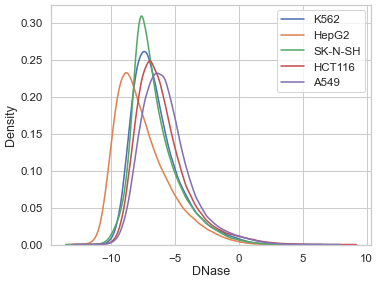

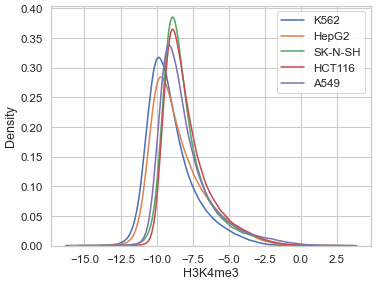

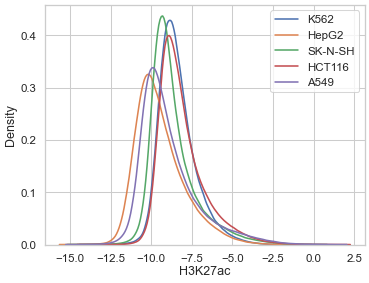

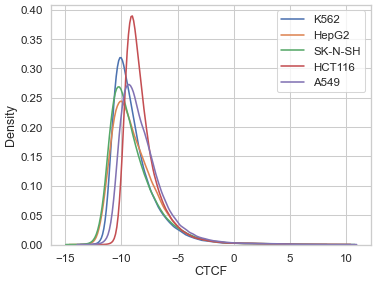

In [24]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}']
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(-0.5, 5)
    plt.xlabel(f'{assay}')
    plt.legend()
    plt.savefig(f'figures/Gosai_MPRA_Sei_{assay}_distribution.png', dpi=400)
    plt.show()

In [26]:
# normalize between different cell types and assays

normalize_parameters = {}

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        
        x = MPRA_df[f'{cell_type}_{assay}']
        condition = data_split_dict['train']
        x_train = x[condition]

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        x = (x - x_mean) / x_std

        normalize_parameters[f'{cell_type}_{assay}_mean'] = x_mean
        normalize_parameters[f'{cell_type}_{assay}_std'] = x_std

        ######
        x[x<0] = 0
        ######

        MPRA_df[f'{cell_type}_{assay}'] = x

In [38]:
pd.DataFrame(normalize_parameters, index=['Gosai_MPRA_train']).to_csv('outputs/Sei_feature_norm_parameters.csv')

In [28]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

,DNase,H3K4me3,H3K27ac,CTCF
K562,0.600,0.531,0.521,0.406
HepG2,0.528,0.530,0.487,0.381
SK-N-SH,0.462,0.523,0.499,0.362
HCT116,0.543,0.536,0.535,0.376
A549,0.438,0.397,0.414,0.273


In [29]:
# 真实活性和DNase的相关性
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
    pearson_df = pd.DataFrame(index=cell_types, columns=cell_types_assay, dtype=float)
    for cell_type in cell_types:
        for cell_type_assay in cell_types_assay:
            df = MPRA_df
            x, y = df[f'{cell_type}'], df[f'{cell_type_assay}']
            r, p = pearson(x, y)
            pearson_df.loc[cell_type, cell_type_assay] = r
    print(assay)
    print(pearson_df)

DNase
         K562_DNase  HepG2_DNase  SK-N-SH_DNase  HCT116_DNase  A549_DNase
K562          0.600        0.446          0.453         0.492       0.487
HepG2         0.567        0.528          0.481         0.519       0.529
SK-N-SH       0.526        0.434          0.462         0.471       0.480
HCT116        0.556        0.488          0.483         0.543       0.524
A549          0.432        0.363          0.337         0.433       0.438
H3K4me3
         K562_H3K4me3  HepG2_H3K4me3  SK-N-SH_H3K4me3  HCT116_H3K4me3  A549_H3K4me3
K562            0.531          0.447            0.471           0.486         0.464
HepG2           0.538          0.530            0.507           0.537         0.519
SK-N-SH         0.510          0.469            0.523           0.515         0.491
HCT116          0.512          0.485            0.500           0.536         0.507
A549            0.380          0.356            0.380           0.405         0.397
H3K27ac
         K562_H3K27ac  HepG2_H

In [27]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_norm.csv', index=False)